### Movie Data Exploratory Data Analysis

In [52]:
import pandas as pd
import numpy as np
import os 

import matplotlib.pyplot as plot
import matplotlib.image as mpimg

Load in data to dataframes

In [79]:
movies_path = os.path.join(os.path.dirname(os.getcwd()),'data\movies.csv')
details_path = os.path.join(os.path.dirname(os.getcwd()),'data\\backups\\details.csv')
#details_path = os.path.join(os.path.dirname(os.getcwd()),'data\\details.csv')

movies = pd.read_csv(movies_path)
details = pd.read_csv(details_path)

print("Variables in movies.csv:\n")
print(movies.columns)

print("\n\nVariables in details.csv:\n")
print(details.columns)

Variables in movies.csv:

Index(['FilmID', 'LinkStub', 'Title', 'ReleaseDate', 'Director', 'Duration',
       'Summary', 'IMDbLink'],
      dtype='object')


Variables in details.csv:

Index(['IMDbLink', 'Rating', 'AvgReview', 'RateCount', 'UserReviewCount',
       'CriticReviewCount', 'Metascore', 'Genres', 'Stars', 'Writers',
       'Country', 'Languages', 'Budget', 'Revenue', 'Tags', 'Reviews',
       'Summaries'],
      dtype='object')


How full are the columns?

In [69]:
print("NA ratios for movies.csv (%):\n")
print(round(100*movies.isna().sum()/(len(movies)),2).sort_values(ascending=False))

NA ratios for movies.csv (%):

IMDbLink       8.52
Director       3.00
Summary        1.21
ReleaseDate    0.60
Title          0.03
FilmID         0.00
LinkStub       0.00
Duration       0.00
dtype: float64


IMDBLink being 8%+ is not really a big deal since those 'movies' are likely to be either short documentaries, pornography, or other things that we really wouldn't consider to be actually 'movies' per se.

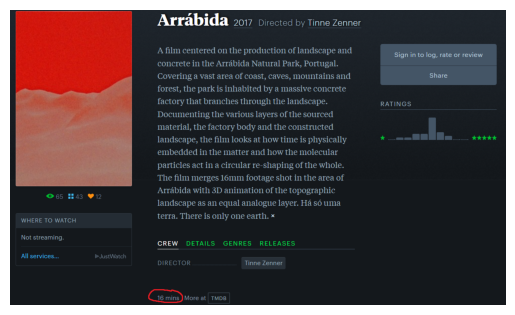

In [70]:
img_path = os.path.join(os.path.dirname(os.getcwd()),'data\\images\\arrabida.png')
plot.axis("off");
plot.imshow(mpimg.imread(img_path));

In [78]:
na_drop_threshold = 1

print(f"NA ratios >{na_drop_threshold}% for details.csv (%):\n")
na_details = round(100*details.isna().sum()/(len(details)),2).sort_values(ascending=False)
print(na_details[na_details>na_drop_threshold])

NA ratios >1% for details.csv (%):

Budget               100.00
Revenue              100.00
Country               71.66
Metascore             41.11
Rating                12.69
CriticReviewCount      3.19
UserReviewCount        2.21
dtype: float64


Budget & revenue being fixed via new scrub

<ul>
<li>Country of origin being so high isn't necessarily concerning, we can have a somewhat analogue via language(s)</li>
<li>The metascore is likely to have a pretty strong correlation with the average rating which we have well-documented</li>
<li>Parental rating really isn't that important either</li>
<li>A ~97% full set of critic/reviewer counts should be a good enough metric for us to determine popularity volume from</li>
</ul>

Next to do:

<ol>
<li>Distributions of the numeric variables (budget, avg ratings & counts, etc.)</li>
    <ul><li>Broken out by genre / language / length group / major director?</li></ul>
<li>Correlations between variables and popularity (volume & quality)</li>
<li>Clustering via tags / summaries</li>
<li>Review sentiment analysis compared with average rating / popularity</li>
</ol>